<a href="https://colab.research.google.com/github/Xiaolingz0663/TensorFlow-Study/blob/main/3_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Regression with Neural Networks in tensorflow


In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


## 40 Creating Sample Regressional Data



### Sample Regression Demo

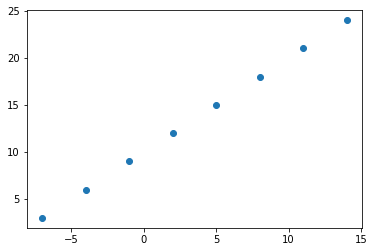

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualize it
plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [ ]:
# Create a demo tensor for the housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

 ## 41 Major Steps of Modeling in Tensorflow

In [ ]:
# Turn NumPy Arrays into Tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)

X, X.shape, y, y.shape

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 TensorShape([8]),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 TensorShape([8]))

In [ ]:
 input_shape = X[0].shape
 output_shape = y[0].shape
 input_shape, output_shape # no dimension here as it's a scalar/single value.

(TensorShape([]), TensorShape([]))

### Stpes in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **compilling a model** - define how a model performance should be measured (loss/metrics) as well as defining how it should improve (optimizer)
3. **Fitting a model** - let the model try to find patterns in the data.


In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE -> Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient 
              metrics=["mae"])

# 3. fit the model
model.fit(X,y,epochs=5) #5 oppertunities to go through X and y


Epoch 1/5
1/1 [==============================] - 1s 607ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# try and make a prediction
y_pred = model.predict([17.0])
y_pred
# 12 is not even close to 17 +10

array([[12.716021]], dtype=float32)

## 42 Improve a Model

To improve out model, we alter almost every part of the 3 stpes we went through before:
1. **creating a model** - add more layers, increase the number of hidden units within each layre, change the activation functions of each year.
2. **Compiling the model** - choose optimization function or change the learning rate of the optimization function
3. **Fitting a model** add more epochs or more training data.

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation='relu'),
                             tf.keras.layers.Dense(100,activation='relu'),
                             tf.keras.layers.Dense(100,activation='relu'),
                             tf.keras.layers.Dense(1)])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# 3. fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 407ms/step - loss: 13.3030 - mae: 13.3030
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.8554 - mae: 12.8554
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.4230 - mae: 12.4230
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9513 - mae: 11.9513
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.4463 - mae: 11.4463
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8730 - mae: 10.8730
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1900 - mae: 10.1900
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3551 - mae: 9.3551
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 8.3088 - mae: 8.3088
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0221 - mae: 7.0221
Epoch 11/100
1/1 [==============================] - 0s 4ms/ste

In [ ]:
y_pred = model.predict([17.0])
y_pred

array([[31.844091]], dtype=float32)

In [ ]:
y_pred

array([[31.844091]], dtype=float32)

### **Common Ways to Improve a model:**
- adding layers
- increase the number of hidden units
- change the activation functions
- change the optimization functions
- change the learning rate (the most important method)
- fitting on more data
- fitting for longer (epochs)

## 45 Evaluate a Model

A typical workflow to go through when building neural networks:

```
Building a model -> evaluate it -> build/tweak it -> evalate it -> build/tweak it -> evaluate it ...
```


### **Visualize, Visualize, Visualize**

It's a good idea to visualize:
* **The Data** 
* **The model itself**
* **The training of a model**
* **The predictions of the model**

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### **Visualize the Data**

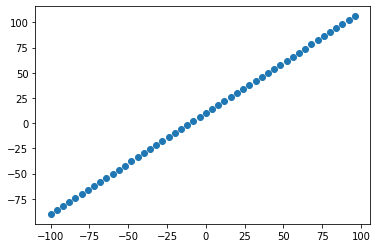

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

#### **Split data into training/test set**

- **Training Set** - typically 70-80% of the total data
- **Validation Set** -typically 10-15% of the total data
- **Test Set** - typically 10-15% of the total data

The process is called **Generalization** - the ability for a machine learning model to perform well on data it hasn't seen before.

In [ ]:
# check the length of sample data
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test)

(40, 10)

#### **Visualizing the Training and Testing Data** 

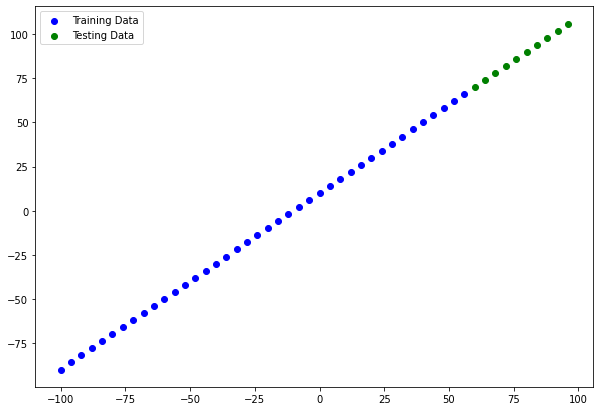

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c='b',label='Training Data')
plt.scatter(X_test, y_test,c='g',label='Testing Data')
plt.legend()

### **Visualizing the Model**

#### **Buidling a Model**

In [ ]:
tf.random.set_seed(42)

# 1. create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
                             tf.keras.layers.Dense(1,name="output_layer")
                             #define the input shape as 1. If input shape isnot defined, keras will figure it out automatically
],name = "model_1")

# 2. compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3.Fit Model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 3ms

#### **Visualizing the Model**

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


#### **Visualizing Modle Layers using Model Summary**

- **Dense** - fully connected layer 
- **Total Params** - total number of parameters in the model. (X and Y -> 2 parameters)
- **Trainable params** - the parameters the model can update as it trains
- Non-trainable params - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

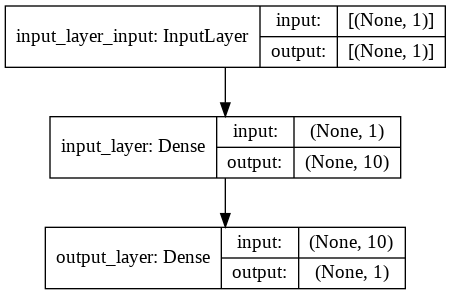

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### **Visualising Model Predictions** 

To visualize predictions, it's good idea to plot them against the ground truth labels.
Often you'll see this in the form of `y_test` or `y_true` versus `y_pred`

In [ ]:
# make predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training Data")
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend();

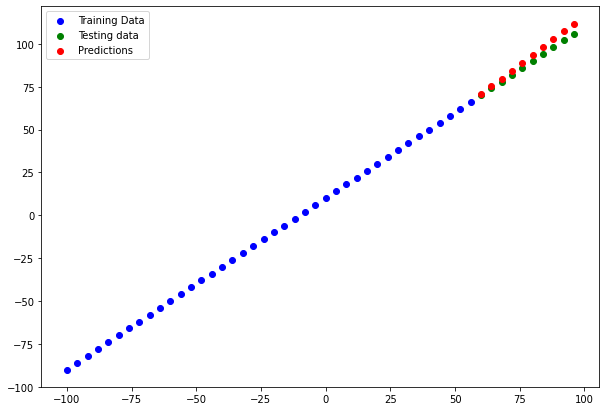

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

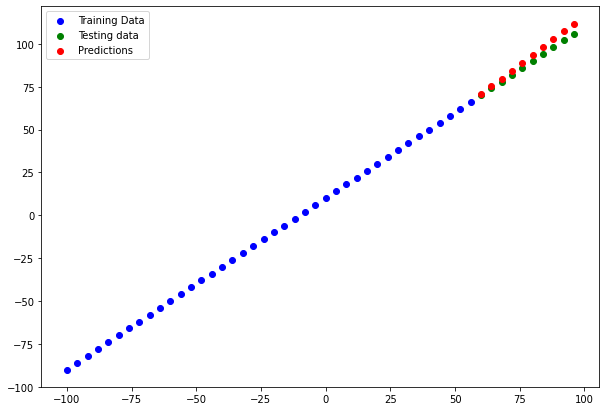

In [ ]:
plot_predictions()

## **50. Evaluating Predictions** MAE/MSE

Two of the main metrics used for regression problems:
- MAE - mean absolute error
- MSE - mean squared error
- Huber

In [ ]:
# evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 115ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
y_pred,y_test

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>


Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [ ]:
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [ ]:
# remove the 1 dimension from our y_preds tensor
y_pred.squeeze().shape

(10,)

In [ ]:
y_test, y_pred.squeeze()

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
         93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
       dtype=float32))

In [ ]:
# cal mae
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>